In [1]:
import pandas as pd
import numpy as np
import matplotlib
pd.set_option('display.max_rows', 500)

%matplotlib inline
import warnings
warnings.simplefilter('ignore', DeprecationWarning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import classification_report
from sklearn.svm import LinearSVC
from sklearn.grid_search import GridSearchCV
from sklearn.preprocessing import RobustScaler
from sklearn.cross_validation import LabelKFold
from scipy import interp
from sklearn import cross_validation
import pylab as pl

from sklearn import svm
from sklearn.metrics import roc_curve, auc
from os import environ
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

C:\Users\tmeshorer\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\tmeshorer\Anaconda2\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
df = pd.read_csv("../data/ml.csv")
len(df)

60565

In [3]:
labels_s = df['hash']
labels = labels_s.values
label_kfold = LabelKFold(labels,n_folds=10)

In [4]:
tchange_column = df['tchange']
target = tchange_column.values
del df['tchange']

In [5]:
#base line
from sklearn.cross_validation import LabelKFold

X_only_act = df[[
 'Act_%',
 'Act_+',
 'Act_A',
 'Act_AA',
 'Act_B',
 'Act_NA',
 'Act_Q',
 'Act_SD',
 'Act_SV']]

base_line_features_array = X_only_act.values

In [6]:
X_both_acts = df[[
 'Act_%',
 'Act_+',
 'Act_A',
 'Act_AA',
 'Act_B',
 'Act_NA',
 'Act_Q',
 'Act_SD',
 'Act_SV',
 'PAct_%',
 'PAct_+',
 'PAct_A',
 'PAct_AA',
 'PAct_B',
 'PAct_NA',
 'PAct_Q',
 'PAct_SD',
 'PAct_SV',
   ]]

both_acts_features_array = X_both_acts.values

In [8]:
X_only_numeric = df[[
     'precent_secs_sofar',
     'precent_words_sofar',
     'time_control',
     'words_control' , 
    ]]

summary_features_array = X_only_numeric.values

In [9]:
X_all =  df[[
 'Act_%',
 'Act_+',
 'Act_A',
 'Act_AA',
 'Act_B',
 'Act_NA',
 'Act_Q',
 'Act_SD',
 'Act_SV',
 'PAct_%',
 'PAct_+',
 'PAct_A',
 'PAct_AA',
 'PAct_B',
 'PAct_NA',
 'PAct_Q',
 'PAct_SD',
 'PAct_SV',
 'precent_secs_sofar',
 'precent_words_sofar',
 'time_control',
 'words_control'
   ]]

all_features_array = X_all.values

In [10]:
len(all_features_array)

60565

In [11]:
#Use random forest
result = dict()
measure=['f1','recall','precision','roc_auc','accuracy'] 
#measure=['roc_auc'] 
for m in measure:
    result[m] = dict()
data   =[("baseline",base_line_features_array),("both",both_acts_features_array),("summary",summary_features_array),("all",all_features_array)]
for m in measure:
    for d in data:
        print "running %s on %s" %(m,d[0])
        rf = RandomForestClassifier(n_estimators=200,n_jobs=-1)
        x= cross_validation.cross_val_score(rf, d[1], target, cv=label_kfold,scoring=m)
        result[m][d[0]] = np.mean(x)
result        
        

running f1 on baseline


KeyboardInterrupt: 

In [14]:
result_df = pd.DataFrame(result)
result_df
text_file = open("../tbl/auc_tbl.tex", "w")
text_file.write(result_df.to_latex())
text_file.close()
print result_df.to_latex()

\begin{tabular}{lrrrrr}
\toprule
{} &  accuracy &        f1 &  precision &    recall &   roc\_auc \\
\midrule
all      &  0.765718 &  0.787481 &   0.774492 &  0.801152 &  0.848495 \\
baseline &  0.627938 &  0.578149 &   0.749824 &  0.470491 &  0.659992 \\
both     &  0.748834 &  0.748210 &   0.819280 &  0.688687 &  0.811097 \\
summary  &  0.679110 &  0.713018 &   0.692053 &  0.735588 &  0.726475 \\
\bottomrule
\end{tabular}



In [13]:
from sklearn.ensemble import GradientBoostingClassifier
result = dict()
measure=['f1','recall','precision','roc_auc','accuracy'] 
for m in measure:
    result[m] = dict()
data   =[("baseline",base_line_features_array),("both",both_acts_features_array),("summary",summary_features_array),("all",all_features_array)]
for m in measure:
    for d in data:
        print "running %s on %s" %(m,d[0])
        rf = GradientBoostingClassifier(random_state=0, n_estimators=300)
        x= cross_validation.cross_val_score(rf, d[1], target, cv=label_kfold,scoring=m)
        print "result for %s is %f" %(m,np.mean(x))
        result[m][d[0]] = np.mean(x)
result       

running f1 on baseline
result for f1 is 0.578149
running f1 on both
result for f1 is 0.748210
running f1 on summary
result for f1 is 0.713018
running f1 on all
result for f1 is 0.787481
running recall on baseline
result for recall is 0.470491
running recall on both
result for recall is 0.688687
running recall on summary
result for recall is 0.735588
running recall on all
result for recall is 0.801152
running precision on baseline
result for precision is 0.749824
running precision on both
result for precision is 0.819280
running precision on summary
result for precision is 0.692053
running precision on all
result for precision is 0.774492
running roc_auc on baseline
result for roc_auc is 0.659992
running roc_auc on both
result for roc_auc is 0.811097
running roc_auc on summary
result for roc_auc is 0.726475
running roc_auc on all
result for roc_auc is 0.848495
running accuracy on baseline
result for accuracy is 0.627938
running accuracy on both
result for accuracy is 0.748834
running ac

{'accuracy': {'all': 0.76571833660883148,
  'baseline': 0.6279379475515533,
  'both': 0.74883392925238379,
  'summary': 0.67911029930363853},
 'f1': {'all': 0.78748088680833639,
  'baseline': 0.57814876502756096,
  'both': 0.74821042565489881,
  'summary': 0.71301848113600197},
 'precision': {'all': 0.77449222373941784,
  'baseline': 0.74982397884086482,
  'both': 0.8192797302424234,
  'summary': 0.69205313344365826},
 'recall': {'all': 0.80115238979798353,
  'baseline': 0.47049131510857023,
  'both': 0.68868693817334981,
  'summary': 0.7355881937294273},
 'roc_auc': {'all': 0.84849503305294083,
  'baseline': 0.65999196238141122,
  'both': 0.81109735679502748,
  'summary': 0.72647507809029688}}

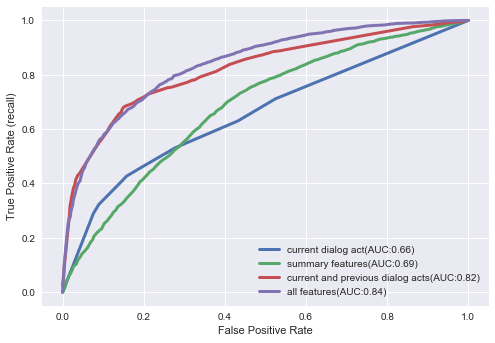

In [33]:
from sklearn.metrics import roc_curve, roc_auc_score
import seaborn as sns
sns.set_style("darkgrid")
mean_tpr = 0.0

rf = RandomForestClassifier(n_estimators=200)
datasets=[base_line_features_array,summary_features_array,both_acts_features_array,all_features_array]
captions = ['current dialog act',
          'summary features',
          'current and previous dialog acts',
          'all features']
X=all_features_array
y=target
i=1
j=0
for a in datasets: 
    X=a
    for train, test in label_kfold:
        probas_ = rf.fit(X[train], y[train]).predict_proba(X[test])
        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
        #mean_tpr += interp(mean_fpr, fpr, tpr)
        #mean_tpr[0] = 0.0
        roc_auc = auc(fpr, tpr)
        acc = rf.score(X[test], y[test])
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate (recall)")
        plt.plot(fpr, tpr, label="%s(AUC:%.2f)" % (captions[j],roc_auc), linewidth=3)
        j = j + 1
        break
    plt.legend(loc='best')  
    plt.savefig('../figures/roc.pdf')



Feature ranking:
1. feature precent_secs_sofar (0.230334)
2. feature precent_words_sofar (0.211252)
3. feature time_control (0.158038)
4. feature words_control (0.133128)
5. feature PAct_B (0.059627)
6. feature Act_B (0.038086)
7. feature PAct_SD (0.027951)
8. feature Act_SD (0.022430)
9. feature PAct_Q (0.018422)
10. feature Act_+ (0.012223)
11. feature PAct_SV (0.011632)
12. feature Act_AA (0.010932)
13. feature Act_Q (0.010058)
14. feature PAct_AA (0.009922)
15. feature PAct_+ (0.009770)
16. feature Act_SV (0.008521)
17. feature Act_% (0.007124)
18. feature PAct_% (0.005900)
19. feature PAct_A (0.004268)
20. feature Act_A (0.004167)
21. feature Act_NA (0.003314)
22. feature PAct_NA (0.002900)


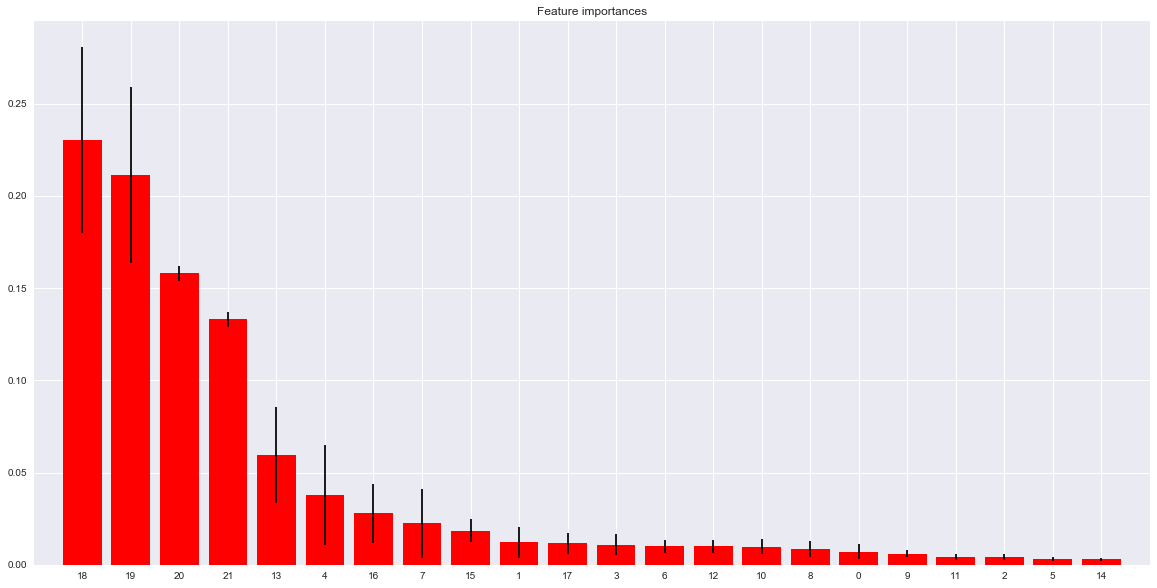

In [19]:
#Feature importance
names =  [
 'Act_%',
 'Act_+',
 'Act_A',
 'Act_AA',
 'Act_B',
 'Act_NA',
 'Act_Q',
 'Act_SD',
 'Act_SV',
 'PAct_%',
 'PAct_+',
 'PAct_A',
 'PAct_AA',
 'PAct_B',
 'PAct_NA',
 'PAct_Q',
 'PAct_SD',
 'PAct_SV',
 'precent_secs_sofar',
 'precent_words_sofar',
 'time_control',
 'words_control'
  ]
sns.set_style("darkgrid")
X=all_features_array
y=target
rf = RandomForestClassifier(n_estimators=200)
for train, test in label_kfold:
        rf.fit(X[train], y[train])
        importances = rf.feature_importances_
        std = np.std([tree.feature_importances_ for tree in rf.estimators_],axis=0)
        indices = np.argsort(importances)[::-1]
    

        # Print the feature ranking
        print("Feature ranking:")

        for f in range(X.shape[1]):
            print("%d. feature %s (%f)" % (f + 1, names[indices[f]], importances[indices[f]]))

        # Plot the feature importances of the forest
        plt.figure(figsize=(20,10))
        plt.title("Feature importances")
        plt.bar(range(X.shape[1]), importances[indices],
               color="r", yerr=std[indices], align="center")
        plt.xticks(range(X.shape[1]), indices)
        plt.xlim([-1, X.shape[1]])
        plt.show()
        break



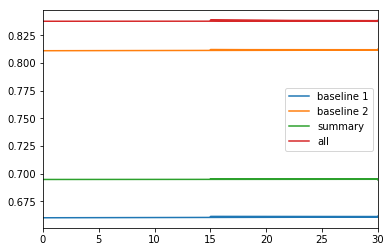

In [15]:
d = {0: [0.659992, 0.811185,0.694657, 0.837863],
     15: [0.661070, 0.812167, 0.695172, 0.838777],
     30: [0.661265, 0.812493, 0.694351, 0.838533],
     45: [0.660901, 0.812012,  0.694907 , 0.838016],
     60: [0.660261, 0.811513, 0.695737, 0.836148],
     120: [0.659855, 0.809206, 0.691010, 0.831940],
     180: [0.660598 , 0.806845, 0.692128, 0.828085],
    }

frame = pd.DataFrame.from_items(d.items(), 
                            orient='index', 
                            columns=['baseline 1','baseline 2','summary','all'])


frame.plot()

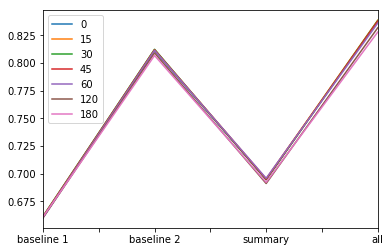

In [14]:
f4.plot()